In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
'''
!conda install -c conda-forge pillow -y
!conda install -c conda-forge pydicom -y
!conda install -c conda-forge gdcm -y
!pip install pylibjpeg pylibjpeg-libjpeg
'''

'\n!conda install -c conda-forge pillow -y\n!conda install -c conda-forge pydicom -y\n!conda install -c conda-forge gdcm -y\n!pip install pylibjpeg pylibjpeg-libjpeg\n'

In [3]:
df=pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')
df_test=pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/test.csv')

In [4]:
'''
import pydicom
import matplotlib.pylab as plt

# specify your image path
image_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/10130/1672636630.dcm"
ds = pydicom.dcmread(image_path)

plt.imshow(ds.pixel_array)
ds.pixel_array.shape
'''

'\nimport pydicom\nimport matplotlib.pylab as plt\n\n# specify your image path\nimage_path = "/kaggle/input/rsna-breast-cancer-detection/train_images/10130/1672636630.dcm"\nds = pydicom.dcmread(image_path)\n\nplt.imshow(ds.pixel_array)\nds.pixel_array.shape\n'

In [5]:
#df[df.patient_id==10038]
df[df.cancer==1]


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
87,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False
88,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False
89,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False
90,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False
190,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54485,2,9707,1900919592,R,MLO,56.0,1,1,1,NaN,0,NaN,21,False
54593,2,9840,111786935,R,MLO,59.0,1,1,1,NaN,0,NaN,21,False
54594,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,0,NaN,21,False
54595,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,0,NaN,48,False


In [6]:
df.view.value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

In [7]:
df.density.value_counts()

B    12651
C    12175
A     3105
D     1539
Name: density, dtype: int64

In [8]:
df_test

,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [9]:
df2=df.drop(['machine_id','image_id','patient_id','site_id','BIRADS','density','biopsy','invasive','difficult_negative_case'],axis=1)
df2

,laterality,view,age,cancer,implant
0,L,CC,61.0,0,0
1,L,MLO,61.0,0,0
2,R,MLO,61.0,0,0
3,R,CC,61.0,0,0
4,L,CC,55.0,0,0
...,...,...,...,...,...
54701,R,MLO,43.0,0,0
54702,L,MLO,60.0,0,0
54703,L,CC,60.0,0,0
54704,R,MLO,60.0,0,0


In [10]:
df3=pd.get_dummies(df2[['laterality','view']])
df4=df3.drop(['laterality_R','view_LMO'],axis=1)

In [11]:
df4=pd.concat([df2,df4],axis=1)
df4

,laterality,view,age,cancer,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,L,CC,61.0,0,0,1,0,1,0,0,0
1,L,MLO,61.0,0,0,1,0,0,0,0,1
2,R,MLO,61.0,0,0,0,0,0,0,0,1
3,R,CC,61.0,0,0,0,0,1,0,0,0
4,L,CC,55.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
54701,R,MLO,43.0,0,0,0,0,0,0,0,1
54702,L,MLO,60.0,0,0,1,0,0,0,0,1
54703,L,CC,60.0,0,0,1,0,1,0,0,0
54704,R,MLO,60.0,0,0,0,0,0,0,0,1


In [12]:
df5=df4.drop(['laterality','view'],axis=1)
df5

,age,cancer,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,61.0,0,0,1,0,1,0,0,0
1,61.0,0,0,1,0,0,0,0,1
2,61.0,0,0,0,0,0,0,0,1
3,61.0,0,0,0,0,1,0,0,0
4,55.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
54701,43.0,0,0,0,0,0,0,0,1
54702,60.0,0,0,1,0,0,0,0,1
54703,60.0,0,0,1,0,1,0,0,0
54704,60.0,0,0,0,0,0,0,0,1


In [13]:
df5.isnull().sum()

age             37
cancer           0
implant          0
laterality_L     0
view_AT          0
view_CC          0
view_LM          0
view_ML          0
view_MLO         0
dtype: int64

In [14]:
df5.corr()['age'].sort_values(ascending=True)

implant        -0.069599
view_CC        -0.011559
laterality_L    0.001040
view_AT         0.003482
view_ML         0.003859
view_MLO        0.010979
view_LM         0.014475
cancer          0.075155
age             1.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

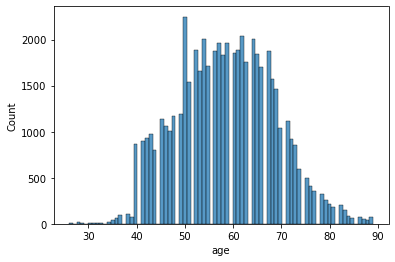

In [15]:
sns.histplot(df5['age'])

In [16]:
print(df5.age.median(),df5.age.mean())

59.0 58.54392800307304


In [17]:
df5['age']=df5['age'].fillna(df5.age.median())

In [18]:
#try to get missing age by applying classifier on the data

In [19]:
df5.isna().sum()

age             0
cancer          0
implant         0
laterality_L    0
view_AT         0
view_CC         0
view_LM         0
view_ML         0
view_MLO        0
dtype: int64

In [20]:
df5.cancer.value_counts()

0    53548
1     1158
Name: cancer, dtype: int64

In [21]:
#try using smote analysis to balance the dataset

<AxesSubplot:>

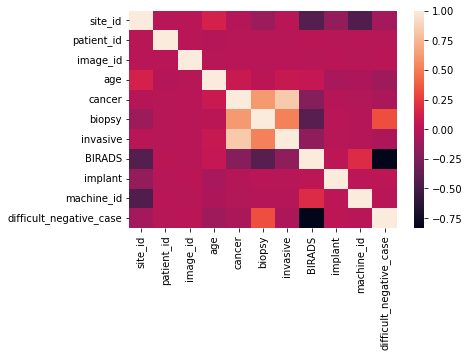

In [22]:
import seaborn as sns
sns.heatmap(df.corr())

In [23]:
df.corr()['cancer'].sort_values(ascending=True)

BIRADS                    -0.210718
difficult_negative_case   -0.059541
machine_id                -0.024888
implant                   -0.014311
site_id                   -0.009975
patient_id                -0.003253
image_id                   0.000223
age                        0.075155
biopsy                     0.613872
invasive                   0.837815
cancer                     1.000000
Name: cancer, dtype: float64

In [24]:
#cc is top view and mlo is from side

In [25]:
'''
import pathlib
data_dir1=pathlib.Path("/kaggle/input/rsna-breast-cancer-detection/train_images")
image_path=list(data_dir1.glob('*'))[:2]
for j in image_path:
    for i in pathlib.Path(j).glob('*'):
#        try:
            ds = pydicom.dcmread(i)
            #plt.imshow(ds.pixel_array)
            print(ds.pixel_array.shape)
#        except:
#            continue
'''

'\nimport pathlib\ndata_dir1=pathlib.Path("/kaggle/input/rsna-breast-cancer-detection/train_images")\nimage_path=list(data_dir1.glob(\'*\'))[:2]\nfor j in image_path:\n    for i in pathlib.Path(j).glob(\'*\'):\n#        try:\n            ds = pydicom.dcmread(i)\n            #plt.imshow(ds.pixel_array)\n            print(ds.pixel_array.shape)\n#        except:\n#            continue\n'

In [26]:
'''
import pathlib
#import pylibjpeg
data_dir=pathlib.Path("/kaggle/input/rsna-breast-cancer-detection/train_images/34867")
for i in list(data_dir.glob('*')):
   try:
    print(i)
    #ds = dicom.dcmread(i)
    #print(ds.pixel_array.shape)
    ds = dcmread(i)
    print(ds.pixel_array)
   except:
    continue
'''

'\nimport pathlib\n#import pylibjpeg\ndata_dir=pathlib.Path("/kaggle/input/rsna-breast-cancer-detection/train_images/34867")\nfor i in list(data_dir.glob(\'*\')):\n   try:\n    print(i)\n    #ds = dicom.dcmread(i)\n    #print(ds.pixel_array.shape)\n    ds = dcmread(i)\n    print(ds.pixel_array)\n   except:\n    continue\n'

In [27]:
df5

,age,cancer,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,61.0,0,0,1,0,1,0,0,0
1,61.0,0,0,1,0,0,0,0,1
2,61.0,0,0,0,0,0,0,0,1
3,61.0,0,0,0,0,1,0,0,0
4,55.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
54701,43.0,0,0,0,0,0,0,0,1
54702,60.0,0,0,1,0,0,0,0,1
54703,60.0,0,0,1,0,1,0,0,0
54704,60.0,0,0,0,0,0,0,0,1


In [28]:
#from sklearn.preprocessing import MinMaxScaler
#scaler=MinMaxScaler()
#df5[['age']]=scaler.fit_transform(df5[['age']])
#df5

In [29]:
from sklearn.model_selection import train_test_split
X=df5.drop(['cancer'],axis=1)
y=df5['cancer']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [30]:
y_test.value_counts()

0    10686
1      256
Name: cancer, dtype: int64

In [31]:
y_train.value_counts()

0    42862
1      902
Name: cancer, dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train,y_train=smote.fit_resample(X_train,y_train)
y_train.value_counts()

0    42862
1    42862
Name: cancer, dtype: int64

In [33]:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [34]:
pd.DataFrame(y_pred).value_counts()

0    6474
1    4468
dtype: int64

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.60      0.74     10686
           1       0.03      0.57      0.06       256

    accuracy                           0.60     10942
   macro avg       0.51      0.58      0.40     10942
weighted avg       0.96      0.60      0.73     10942



In [36]:
df5

,age,cancer,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,61.0,0,0,1,0,1,0,0,0
1,61.0,0,0,1,0,0,0,0,1
2,61.0,0,0,0,0,0,0,0,1
3,61.0,0,0,0,0,1,0,0,0
4,55.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
54701,43.0,0,0,0,0,0,0,0,1
54702,60.0,0,0,1,0,0,0,0,1
54703,60.0,0,0,1,0,1,0,0,0
54704,60.0,0,0,0,0,0,0,0,1


In [37]:
df_test_new=df_test.drop(['site_id','patient_id','image_id','machine_id','prediction_id'],axis=1)
df_test_new

,laterality,view,age,implant
0,L,MLO,81,0
1,L,CC,81,0
2,R,MLO,81,0
3,R,CC,81,0


In [38]:
df.view.value_counts()

MLO    27903
CC     26765
AT        19
LM        10
ML         8
LMO        1
Name: view, dtype: int64

In [39]:
X_train

,age,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,77.000000,0,1,0,0,0,0,1
1,68.000000,0,1,0,1,0,0,0
2,64.000000,0,1,0,1,0,0,0
3,44.000000,0,0,0,1,0,0,0
4,61.000000,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...
85719,65.000000,0,0,0,1,0,0,0
85720,71.000000,0,1,0,0,0,0,1
85721,40.667768,0,0,0,1,0,0,0
85722,53.000000,0,1,0,0,0,0,1


In [40]:
df_test_new1=pd.get_dummies(df_test_new[['laterality','view']])
df_test_new2=df_test_new1.drop(['laterality_R'],axis=1)
df_test_new=pd.concat([df_test_new,df_test_new2],axis=1).drop(['laterality','view'],axis=1)
df_test_new['view_AT']=np.zeros(4)
df_test_new['view_ML']=np.zeros(4)
df_test_new['view_LM']=np.zeros(4)
df_test_new=df_test_new.iloc[:,[0,1,2,5,3,7,6,4]]
df_test_new

,age,implant,laterality_L,view_AT,view_CC,view_LM,view_ML,view_MLO
0,81,0,1,0.0,0,0.0,0.0,1
1,81,0,1,0.0,1,0.0,0.0,0
2,81,0,0,0.0,0,0.0,0.0,1
3,81,0,0,0.0,1,0.0,0.0,0


In [41]:
#df_test_new[['age']]=scaler.fit_transform(df_test_new[['age']])
#df_test_new

In [42]:
#y_ans=model.predict(df_test_new)
y_ans=model.predict_proba(df_test_new)[:,[1]]

In [43]:
y_ans=y_ans.reshape(4)
y_ans

array([0.73549412, 0.73589411, 0.75726711, 0.75764502])

In [44]:
dcsv={'PassengerId':df_test['prediction_id'],'cancer':y_ans}
dfcsv=pd.DataFrame(dcsv)
dfcsv.to_csv('submission.csv',index=False)